In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

In [13]:
# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model_weights-skewed.h5'
model_name = 'bottleneck_model-skewed.h5'
data_dir = '../data-skewed'
nb_train_samples = 11400
epochs = 50
batch_size = 16

In [14]:
def save_bottleneck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
    
    np.save('bottleneck_features_train-skewed.npy', bottleneck_features_train)

In [19]:
def train_top_model():
    train_data = np.load(open('bottleneck_features_train-skewed.npy', 'rb'))
    train_labels = np.array(
        [0] * (1400) + [1] * (9992))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_split=0.1)
    model.save_weights(top_model_weights_path)
    model.save(model_name)
    return model

In [16]:
save_bottleneck_features()

Found 11400 images belonging to 2 classes.


In [20]:
model = train_top_model()

(11392,)
(11392, 4, 4, 512)
Train on 10252 samples, validate on 1140 samples
Epoch 1/50
10252/10252 [==============================] - 18s 2ms/step - loss: 0.5061 - acc: 0.8807 - val_loss: 0.1120 - val_acc: 0.9754
Epoch 2/50
10252/10252 [==============================] - 18s 2ms/step - loss: 0.2855 - acc: 0.9050 - val_loss: 0.0953 - val_acc: 0.9921
Epoch 3/50
10252/10252 [==============================] - 18s 2ms/step - loss: 0.2573 - acc: 0.9163 - val_loss: 0.0858 - val_acc: 0.9781
Epoch 4/50
10252/10252 [==============================] - 18s 2ms/step - loss: 0.2449 - acc: 0.9216 - val_loss: 0.1883 - val_acc: 0.9465
Epoch 5/50
10252/10252 [==============================] - 18s 2ms/step - loss: 0.2361 - acc: 0.9239 - val_loss: 0.1098 - val_acc: 0.9684
Epoch 6/50
10252/10252 [==============================] - 18s 2ms/step - loss: 0.2232 - acc: 0.9302 - val_loss: 0.0876 - val_acc: 0.9921
Epoch 7/50
10252/10252 [==============================] - 18s 2ms/step - loss: 0.2133 - acc: 0.9342 -

In [21]:
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img

base_model = VGG16(weights='imagenet', include_top=False)
print("base model loaded")

model = load_model(model_name)
model.load_weights(top_model_weights_path)

def shape_img(img):
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x = x / 255.
    return x

def build_feature_img(model, img):
    return model.predict(shape_img(img))

def make_prediction(base_model, model, img):
    feature_img = build_feature_img(base_model, img)
    return model.predict_classes(feature_img), model.predict_proba(feature_img)

def predict(img):
    prediction, prob = make_prediction(base_model, model, img)
    return ['hotdog', 'not hotdog'][prediction.item(0)], prob

base model loaded


('hotdog', array([[  8.29877081e-07]], dtype=float32))


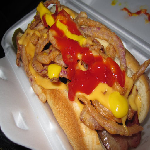

In [22]:
hotdog_img = load_img('../test/hotdog/2417.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img))
display(hotdog_img)

('not hotdog', array([[ 0.99998367]], dtype=float32))


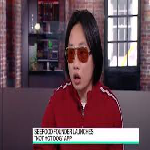

In [23]:
hotdog_img6 = load_img('../test/not_hotdog/1.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img6))
display(hotdog_img6)

('not hotdog', array([[ 0.85322726]], dtype=float32))


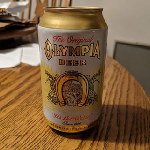

In [24]:
hotdog_img7 = load_img('../test/not_hotdog/2.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img7))
display(hotdog_img7)

('hotdog', array([[  6.78080232e-14]], dtype=float32))


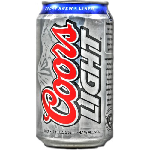

In [25]:
hotdog_img8 = load_img('../test/not_hotdog/3.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img8))
display(hotdog_img8)

('hotdog', array([[ 0.3407484]], dtype=float32))


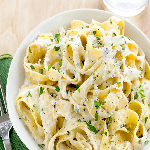

In [26]:
hotdog_img9 = load_img('../test/not_hotdog/4.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img9))
display(hotdog_img9)

('not hotdog', array([[ 0.99943548]], dtype=float32))


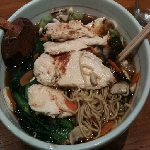

('not hotdog', array([[ 0.90680575]], dtype=float32))


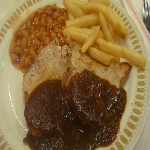

In [27]:
not_hotdog_img = load_img('../test/not_hotdog/9497.jpg', False, target_size=(img_width, img_height))
not_hotdog_img2 = load_img('../data/not_hotdog/963022.jpg', False, target_size=(img_width, img_height))
print(predict(not_hotdog_img))
display(not_hotdog_img)
print(predict(not_hotdog_img2))
display(not_hotdog_img2)

('hotdog', array([[ 0.]], dtype=float32))


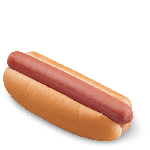

In [28]:
hotdog_img3 = load_img('../test/hotdog/1.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img3))
display(hotdog_img3)

('hotdog', array([[  1.93066635e-12]], dtype=float32))


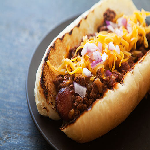

In [29]:
hotdog_img9 = load_img('../test/hotdog/4.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img9))
display(hotdog_img9)

('hotdog', array([[  4.61116562e-11]], dtype=float32))


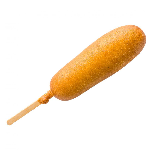

In [30]:
hotdog_imgc = load_img('../test/hotdog/5.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_imgc))
display(hotdog_imgc)

('not hotdog', array([[ 0.99999619]], dtype=float32))


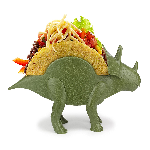

In [31]:
hotdog_imgn = load_img('../test/not_hotdog/5.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_imgn))
display(hotdog_imgn)

('not hotdog', array([[ 1.]], dtype=float32))


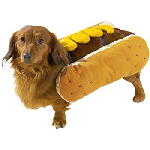

In [32]:
hotdog_imgd = load_img('../test/hotdog/6.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_imgd))
display(hotdog_imgd)

('hotdog', array([[  1.68305364e-17]], dtype=float32))


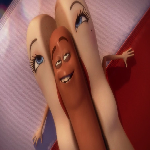

In [33]:
hotdog_imgd = load_img('../test/hotdog/7.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_imgd))
display(hotdog_imgd)